In [1]:
from pylab import rcParams
rcParams['figure.facecolor'] = 'white'
rcParams['figure.facecolor'] = 'white'
rcParams['figure.dpi'] = 80

#%matplotlib inline
#from __future__ import print_function
import numpy as np
import time
import astropy
import h5py
#print h5py.version.info

from tlpipe.timestream import timestream_task
from tlpipe.timestream import dispatch
from tlpipe.timestream import freq_rebin

from fpipe.pipeline.pipeline import run_pipeline
from fpipe.plot import plot_waterfall

from fpipe.timestream import bandpass_cal

from fpipe.map import dirtymap

DATA_BASE = '/home/wangyg/data/'
#os.environ['TL_OUTPUT'] = DATA_BASE + 'meerkat/'

In [2]:
feed_line = [
    [16, 17, 18,],
    [13,  4,  3,  9],
    [1,   2,  8,  5, 14],
    [15,  6,  7, 19],
    [10, 11, 12,],
]


#DATA_Key = '0529'
DATA_Key = '0531'

FILE_LIST = []
Tnoise_file = None

if DATA_Key == '0529':
    file_temp = 'SDSS_N_2a/20190529/SDSS_N_2a_arcdrift%04d-%04d.h5'
    file_st = 2
    file_ed = 2 # max 24
    FILE_LIST = [file_temp%(i, i) for i in range(file_st, file_ed + 1)]
    Tnoise_file = '/home/wangyg/data/ROACH_output/Tnosie_M_low.h5'
    
if DATA_Key == '0531':
    file_temp = 'SDSS_N_2.5/20190531/SDSS_N_2.5_arcdrift%04d-%04d.h5'
    file_st = 3
    file_ed = 3 # max 24
    FILE_LIST = [file_temp%(i, i) for i in range(file_st, file_ed + 1)]
    Tnoise_file = '/home/wangyg/data/ROACH_output/Tnosie_M_low.h5'


In [3]:
reload(bandpass_cal)
@run_pipeline
def analysis():

    pipe_tasks  = []
    data_base   = DATA_BASE
    pipe_outdir = data_base + 'tlpipe_output/'
    pipe_logging = 'info'
    pipe_feedback = 2
    
    bad_time_list = None
    bad_freq_list = None #[[0, 200], [11500, 12000], [18000, 30000], [34000, 38500], [60000, None]]
    
    pipe_tasks.append(dispatch.Dispatch)
    pipe_tasks.append(bandpass_cal.Bandpass_Cal)
    #pipe_tasks.append(freq_rebin.Rebin)
        
    file_list = FILE_LIST
    
    
    ### parameters for Dispatch
    dp_input_files = [pipe_outdir + 'f300-f2348/sir_flagging/%s'%f for f in file_list]
    dp_corr = 'auto'
    #dp_freq_select = (300, 2348)
    dp_pol_select = (0, 2)
    #dp_feed_select = [14,]
    dp_start = 0
    dp_stop = None
    dp_extra_inttime = 0
    dp_exclude_bad = False
    dp_tag_input_iter = False
    dp_out = 'dp'
    
    #bpcal_input_files  = pned_output_files
    bpcal_in = dp_out
    bpcal_output_files = ['f300-f2348/bpcal_bpcal5_Tsys20/%s'%f for f in file_list]
    #bpcal_corr = 'auto'
    #bpcal_freq_select = (300, 2348)
    bpcal_noise_on_time = 1
    bpcal_bandpass_smooth = 1
    bpcal_timevars_poly   = 2
    bpcal_T_sys = 20
    bpcal_Tnoise_file = Tnoise_file

    fd_input_files  = bpcal_output_files
    fd_output_files = ['fd/%s'%f for f in file_list]
    fd_corr = 'auto'
    #fd_freq_select = (200, 1224)
    fd_pol_select = (0, 2)
    fd_sigma_thres  = 3.
    fd_badness_thres = 0.1
    #fd_feed_select = [1, ]
    fd_time_flag_first = False
    fd_time_thres = 6.
    fd_time_cut = 1
    fd_bad_freq_list = None #bad_freq_list
    fd_bad_time_list = None #bad_time_list
    fd_time_block = None #108 * 13
    
    #rb_input_files = pned_output_files
    rb_input_files = fd_output_files
    rb_corr = 'auto'
    rb_freq_select = (5000, 6024)
    rb_pol_select = (0, 2)
    rb_bin_number = 64
    rb_output_files = ['bpcal_rb_f5000-f6024/%s'%f for f in file_list]
    
    return locals()

analysis()

INFO:tlpipe.pipeline.pipeline:Initializing task: <class 'tlpipe.timestream.dispatch.Dispatch'>
INFO:tlpipe.pipeline.pipeline:Initializing task: <class 'fpipe.timestream.bandpass_cal.Bandpass_Cal'>
INFO:tlpipe.pipeline.pipeline:Dispatch reading data from files:
	/home/wangyg/data/tlpipe_output/f300-f2348/sir_flagging/SDSS_N_2.5/20190531/SDSS_N_2.5_arcdrift0003-0003.h5


Reading parameters from dictionary.
Parameters set.
parameter: flush defaulted to value: False
parameter: timing defaulted to value: False
parameter: overwrite defaulted to value: False
Reading parameters from dictionary.
Parameters set.
parameter: show_progress defaulted to value: False
parameter: process_timing defaulted to value: False
parameter: in defaulted to value: None
parameter: exclude defaulted to value: []
parameter: dist_axis defaulted to value: 0
parameter: freq_select defaulted to value: (0, None)
parameter: output_files defaulted to value: None
parameter: feed_select defaulted to value: (0, None)
parameter: iter_start defaulted to value: 0
parameter: tag_output_iter defaulted to value: True
parameter: show_info defaulted to value: False
parameter: chunk_shape defaulted to value: None
parameter: dry_run_time defaulted to value: 0
parameter: iterable defaulted to value: False
parameter: check_status defaulted to value: True
parameter: output_failed_continue defaulted to v

INFO:tlpipe.pipeline.pipeline:Bandpass_Cal writing data to files:
	/home/wangyg/data/tlpipe_output/f300-f2348/bpcal_bpcal5_Tsys20/SDSS_N_2.5/20190531/SDSS_N_2.5_arcdrift0003-0003.h5




=                                        =
=        DONE FOR THE PIPELINE!!         =
=           CONGRATULATIONS!!            =
=                                        =


INFO:tlpipe.pipeline.pipeline:Initializing task: <class 'tlpipe.plot.plot_waterfall.PlotMeerKAT'>
INFO:tlpipe.pipeline.pipeline:PlotMeerKAT reading data from files:
	/home/wangyg/data/tlpipe_output/f300-f2348/bpcal_bpcal5_Tsys20/SDSS_N_2.5/20190531/SDSS_N_2.5_arcdrift0003-0003.h5


18.325776794712333 1.9928232342800478


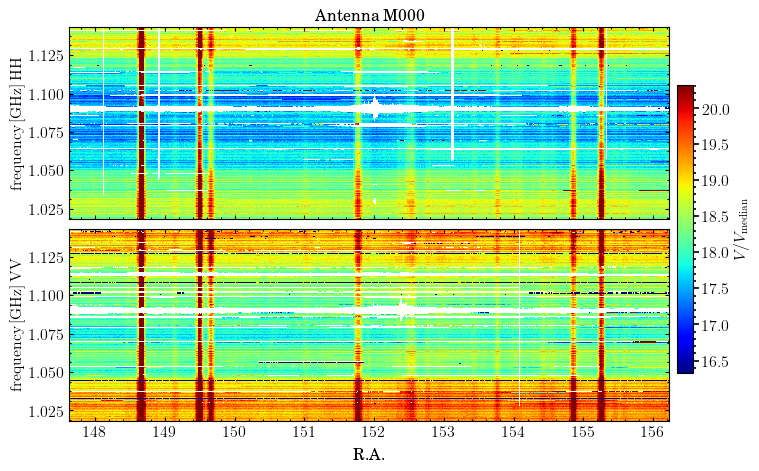

18.259853795271646 2.0152915166761614


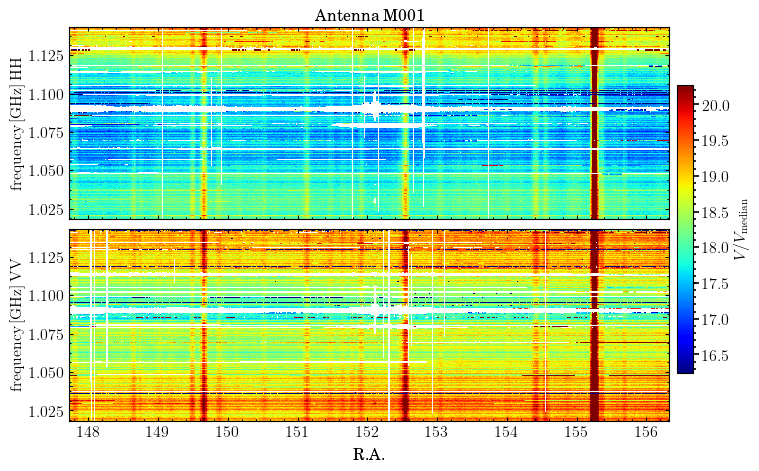

19.19880397413249 1.8407039362053748


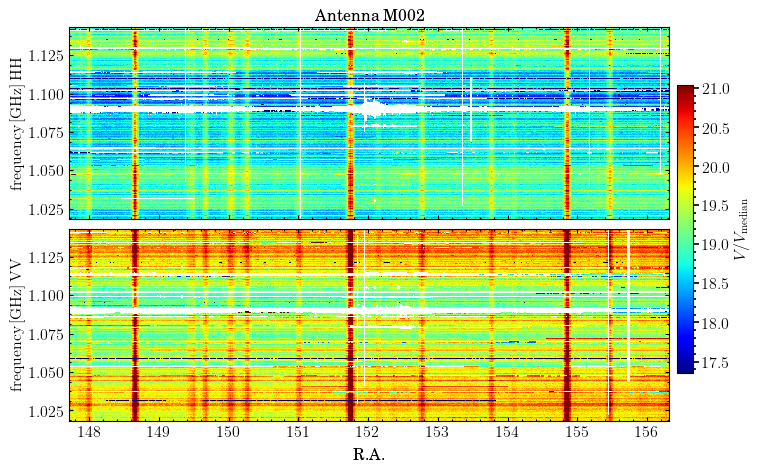

18.5185258804482 2.1004145779241727


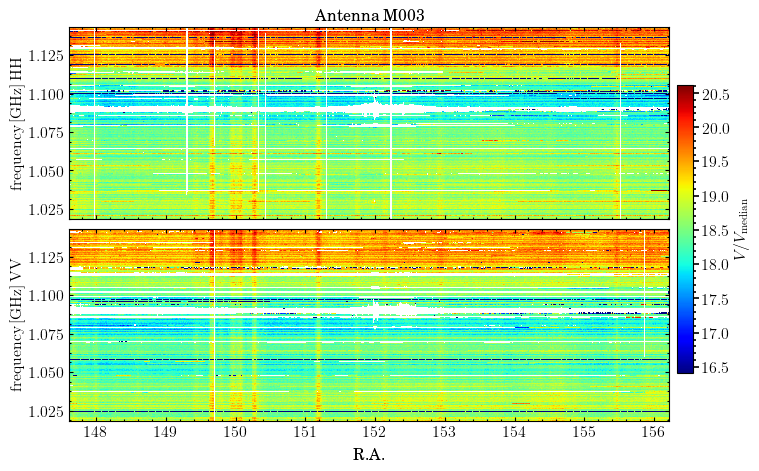

18.368286042729387 1.9255753882136986


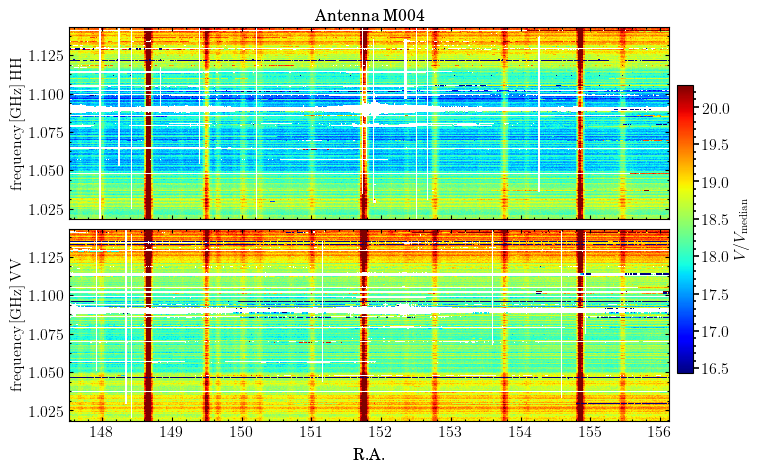

19.024149804627655 1.9357291541141908


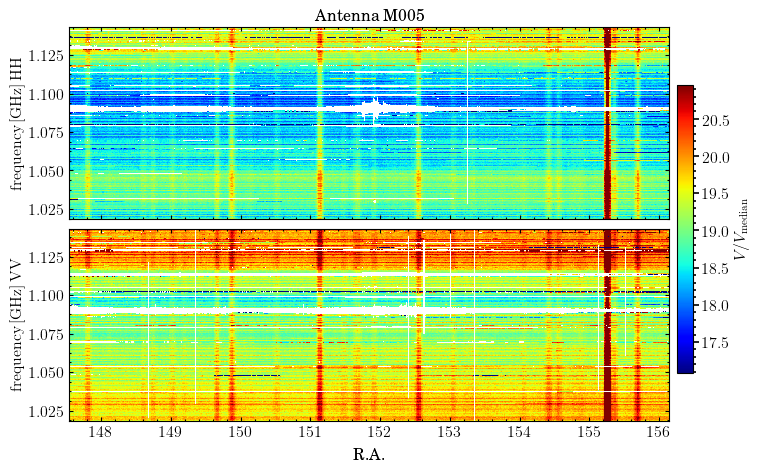

19.53604248846263 2.021065874362387


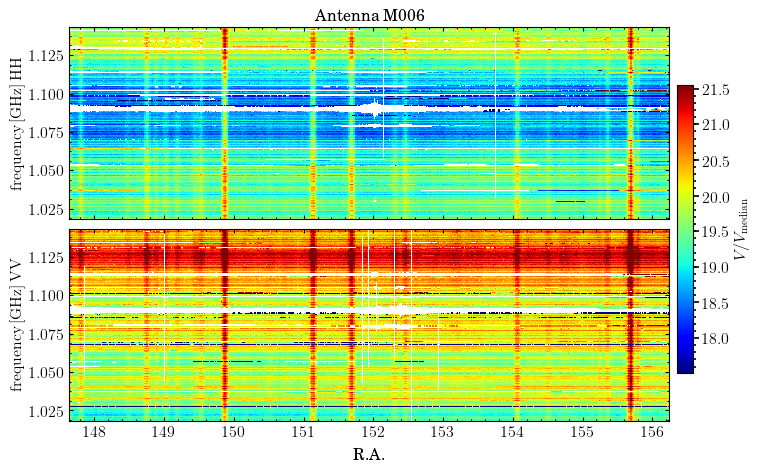

18.839033488458632 1.814428551697627


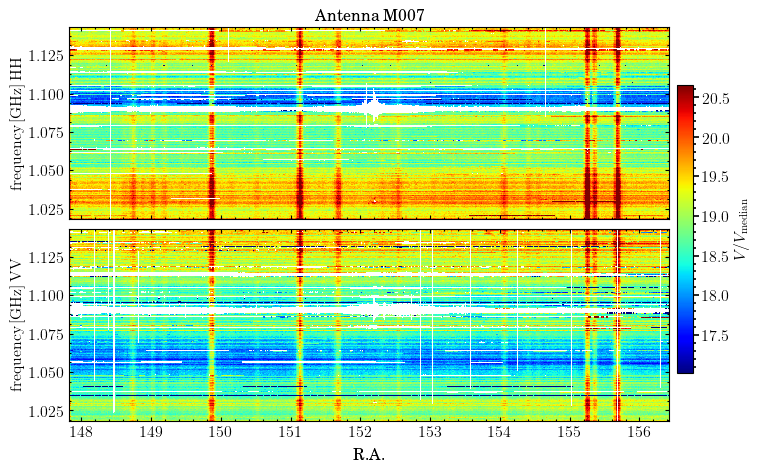

18.2392222275399 1.9498949705749595


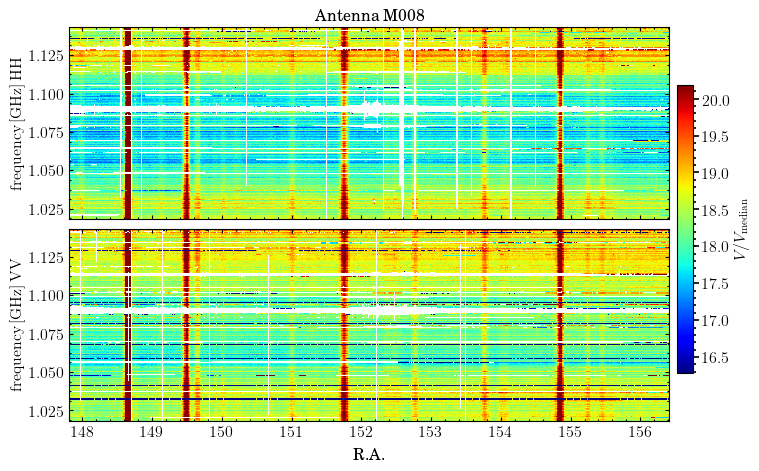

18.855638058811778 2.076085221808773


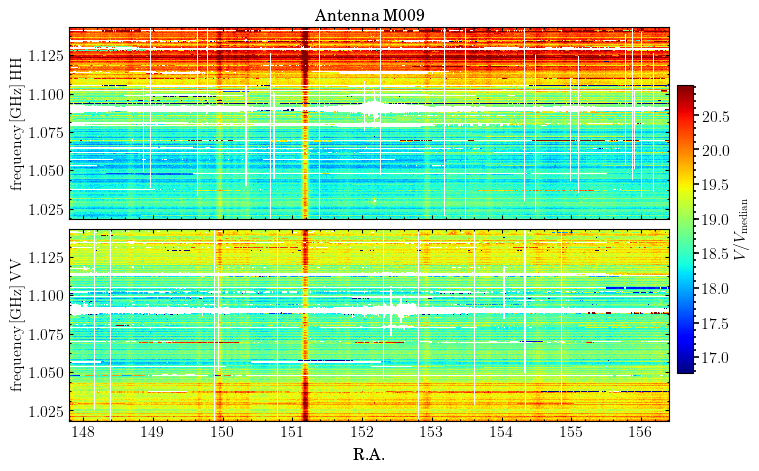

18.444388612319823 1.9509653359680406


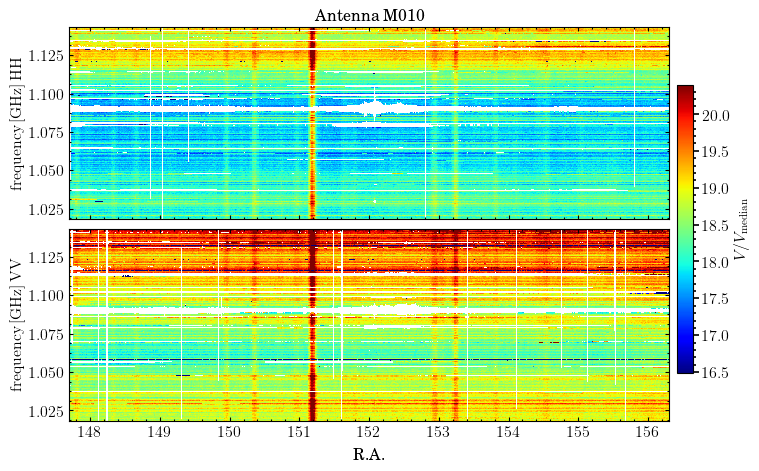

19.673556586338837 1.837623613454451


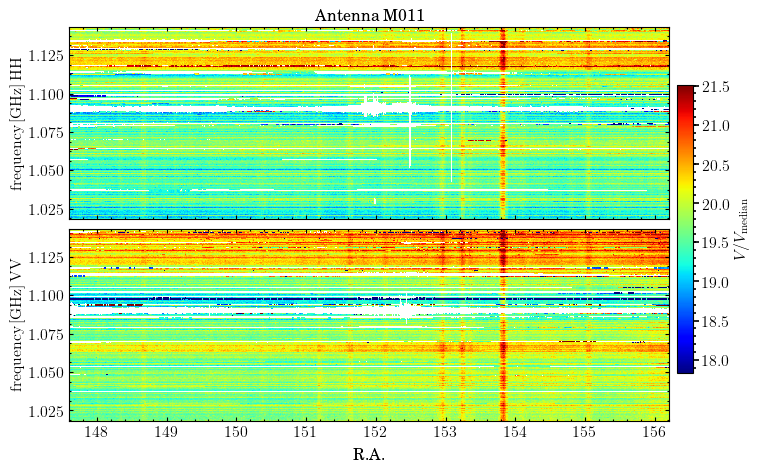

19.286184715839706 1.8924188314135775


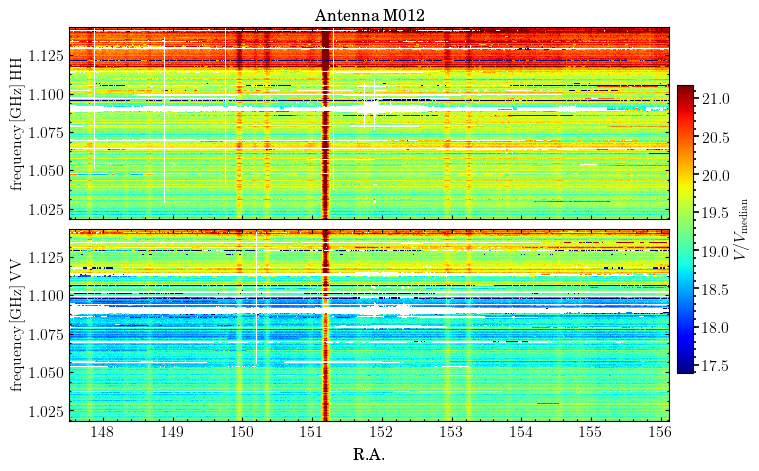

19.48232899865198 1.9172196122522243


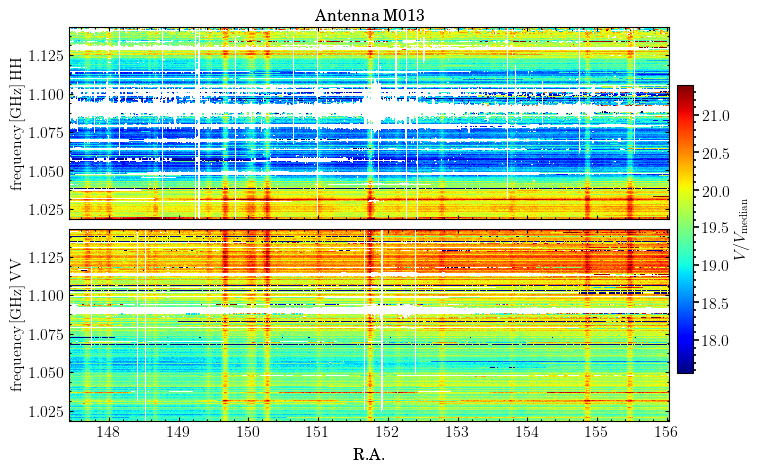

19.16576100094041 1.9363052395447202


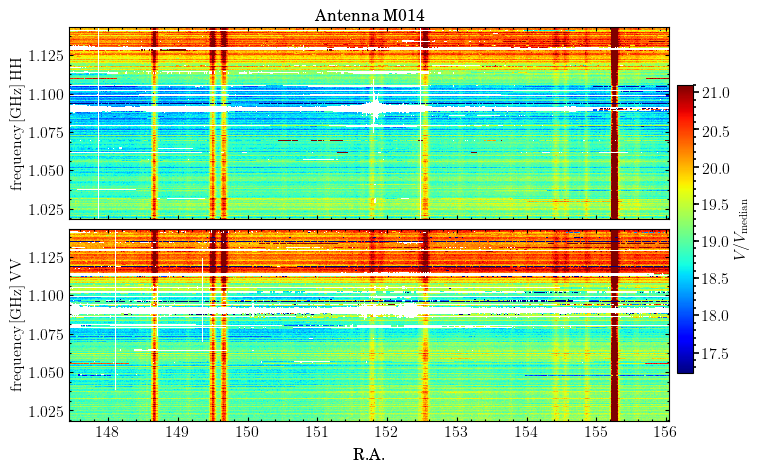

19.454854256567486 1.851754081623694


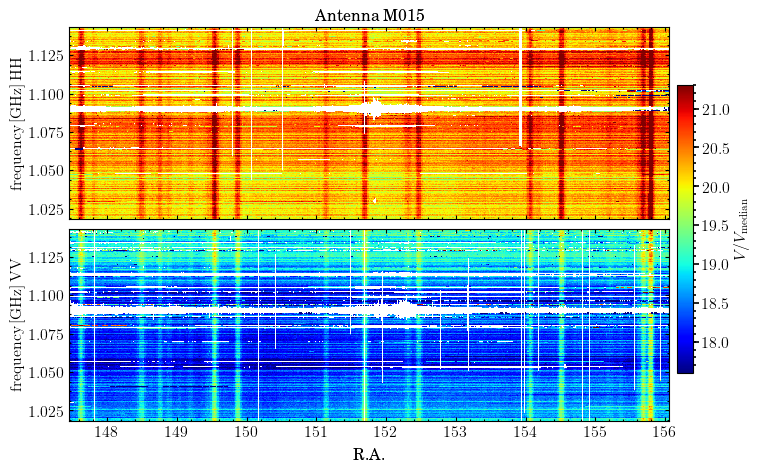

18.828648603739357 2.1114299419235527


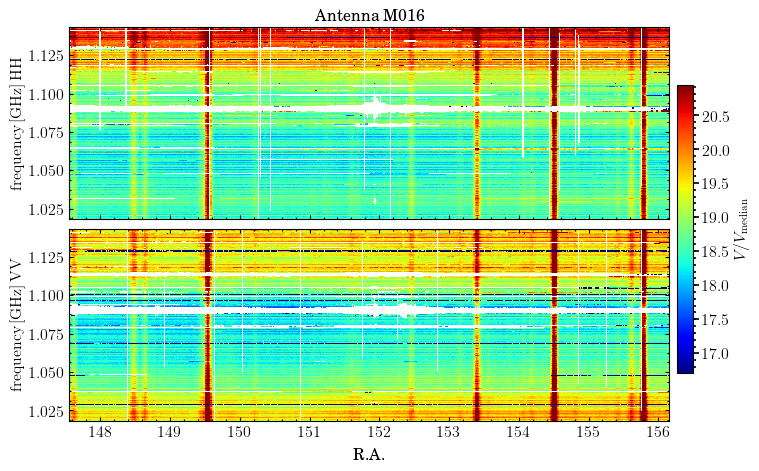

19.658847506425964 2.0190268665079594


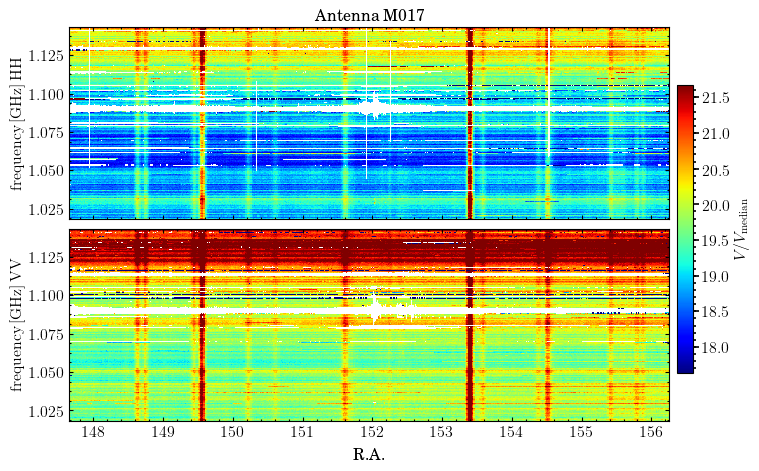

20.113687349172967 2.204615943414957


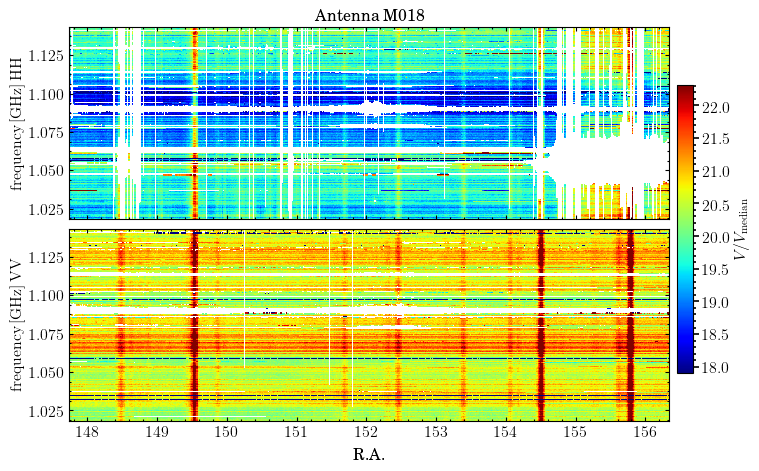



=                                        =
=        DONE FOR THE PIPELINE!!         =
=           CONGRATULATIONS!!            =
=                                        =


In [41]:
reload(plot_waterfall)
@run_pipeline
def plot_wf():
    
    show = 13
    
    pipe_tasks  = []
    data_base   = DATA_BASE
    pipe_outdir = data_base + 'tlpipe_output/'
    pipe_feedback = 0
    
    bad_time_list = None
    bad_freq_list = None #[[0, 200], [11500, 12000], [18000, 30000], [34000, 38500], [60000, None]]

    pipe_tasks.append(plot_waterfall.PlotMeerKAT)
    
    #prefix = 'f300-f2348/pned_bpcal1/'
    prefix = 'f300-f2348/bpcal_bpcal5_Tsys20/'
    
    file_list = FILE_LIST
        
    pkat_input_files = ['%s/%s'%(prefix, f) for f in file_list]
    pkat_re_scale = 1. #0.2
    #pkat_freq_select = (5000, 6024)
    #pkat_freq_select = (2200, 2500)
    #pkat_vmax = 1000
    #pkat_vmin = 200
    pkat_main_data = 'vis'
    pkat_fig_name  = 'wf/%s_%s'%(prefix, DATA_Key)
    pkat_flag_mask = True
    pkat_flag_raw  = False
    pkat_flag_ns   = False
    pkat_plot_ra = True
    #pkat_xmin = 2000
    #pkat_xmax = pkat_xmin + 300
    pkat_bad_freq_list = None # [[100, 320],[900, 950]]
    pkat_bad_time_list = None
    pkat_corr = 'auto'
    #pkat_feed_select = [show + 1, ]
    pkat_plot_index  = False
    pkat_unit = r'$V/V_{\rm median}$'
    #pkat_unit = r'$V$'
    pkat_show = 'all' #show
    
    return locals()

plot_wf()


INFO:tlpipe.pipeline.pipeline:Initializing task: <class 'tlpipe.plot.plot_waterfall.PlotSpectrum'>
INFO:tlpipe.pipeline.pipeline:PlotSpectrum reading data from files:
	/home/wangyg/data/tlpipe_output/f300-f2348/bpcal_bpcal5_Tsys20/SDSS_N_2.5/20190531/SDSS_N_2.5_arcdrift0003-0003.h5


global index  0 [m000]
global index  1 [m001]
global index  2 [m004]
global index  3 [m007]
global index  4 [m013]


=                                        =
=        DONE FOR THE PIPELINE!!         =
=           CONGRATULATIONS!!            =
=                                        =


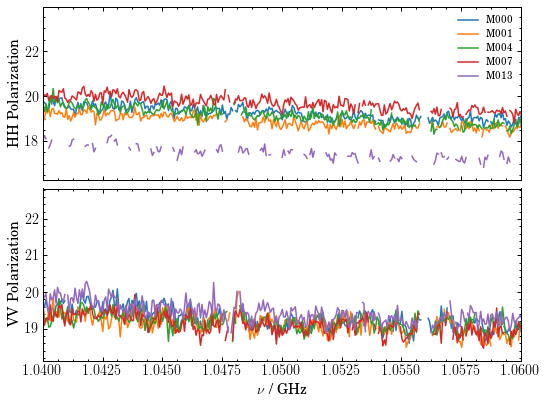

In [7]:
reload(plot_waterfall)
@run_pipeline
def plot_sp():
    
    show = 0
    
    pipe_tasks  = []
    data_base   = DATA_BASE
    pipe_outdir = data_base + 'tlpipe_output/'
    pipe_feedback = 0
    
    bad_time_list = None
    bad_freq_list = None #[[0, 200], [11500, 12000], [18000, 30000], [34000, 38500], [60000, None]]

    pipe_tasks.append(plot_waterfall.PlotSpectrum)

    #prefix = 'f300-f2348/pned_bpcal1/'
    prefix = 'f300-f2348/bpcal_bpcal5_Tsys20/'
    
    file_list = FILE_LIST
        
    psp_input_files = ['%s/%s'%(prefix, f) for f in file_list[:1]]
    #psp_freq_select = (300, 2348)
    #psp_ymax = 1.002
    #psp_ymin = 0.998
    psp_main_data = 'vis'
    psp_output_files  = ['sp/%s_%s'%(prefix, DATA_Key),]
    psp_flag_mask = True
    psp_flag_raw  = False
    psp_flag_ns   = True
    psp_xmin = 1.04
    psp_xmax = 1.06
    psp_bad_freq_list = None # [[100, 320],[900, 950]]
    psp_bad_time_list = None
    psp_corr = 'auto'
    psp_feed_select = feed_line[2]
    psp_plot_index  = True
    #psp_unit = r'$V$'
    psp_show = show
    
    return locals()

plot_sp()

global index  0 [m000]
16.384


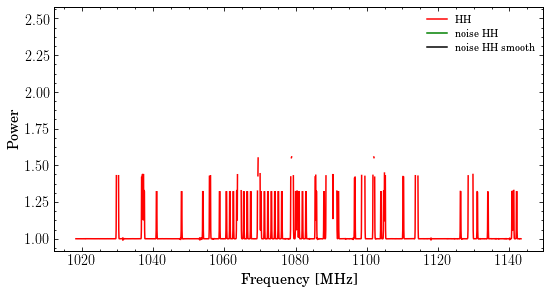



=                                        =
=        DONE FOR THE PIPELINE!!         =
=           CONGRATULATIONS!!            =
=                                        =


In [15]:
reload(plot_waterfall)
@run_pipeline
def plot_spec_with_nd():
    
    show = 0
    
    pipe_tasks  = []
    data_base   = DATA_BASE
    pipe_outdir = data_base + 'tlpipe_output/'
    pipe_feedback = 0
    
    bad_time_list = None
    bad_freq_list = None #[[0, 200], [11500, 12000], [18000, 30000], [34000, 38500], [60000, None]]

    pipe_tasks.append(plot_waterfall.CheckSpec)
    
    prefix = 'f300-f2348/pned_bpcal1/'
    
    file_list = FILE_LIST
        
    csp_input_files = ['%s/%s'%(prefix, f) for f in file_list[:1]]
    #csp_freq_select = (300, 2348)
    #csp_ymax = 1.01
    #csp_ymin = 0.99
    csp_main_data = 'vis'
    csp_output_files  = ['sp/%s_%s'%(prefix, DATA_Key),]
    csp_flag_mask = True
    csp_flag_raw  = False
    csp_flag_ns   = True
    #csp_xmin = 1030
    #csp_xmax = 1066
    csp_bad_freq_list = None # [[100, 320],[900, 950]]
    csp_bad_time_list = None
    csp_corr = 'auto'
    csp_feed_select = [1,]
    csp_plot_index  = False
    #csp_unit = r'$V$'
    csp_show = show
    
    return locals()

plot_spec_with_nd()

Uisng Noise Diode Mask for Ant. 000
[147.6143435376184, 156.22555101559394, 26.64063975016276, 26.714594395955405]
24


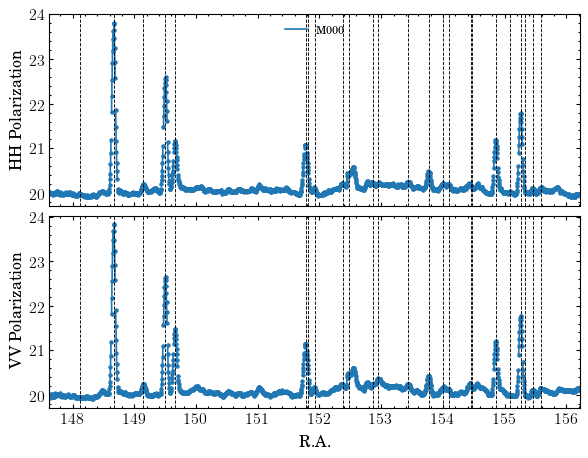

In [94]:
reload(plot_waterfall)
@run_pipeline
def plot_ts():
    show = 0
    
    pipe_tasks  = []
    data_base   = DATA_BASE
    pipe_outdir = data_base + 'tlpipe_output/'
    pipe_feedback = 0
    
    bad_time_list = None
    bad_freq_list = None #[[0, 200], [11500, 12000], [18000, 30000], [34000, 38500], [60000, None]]

    pipe_tasks.append(plot_waterfall.PlotVvsTime)
    #pipe_tasks.append(plot_waterfall.PlotNcalVSTime)
    
    file_list = FILE_LIST
        
    pts_input_files = ['bpcal_Tsys20/%s'%f for f in file_list]
    pts_output_files = ['ts/%s'%f for f in file_list]
    pts_re_scale = None
    #pts_ymin = 1.e2 #1. - 0.0099
    #pts_ymax = 1.e1 #1. + 0.0099
    pts_freq_select = (2000, 2400)
    pts_show = show
    pts_main_data = 'vis'
    pts_bad_time_list = None #bad_time_list
    pts_bad_freq_list = None #bad_freq_list
    pts_corr = 'auto'
    pts_feed_select = [1,]
    #pts_feed_select = [1, 2, 8, 5, 14] #[show + 1, ]
    #pts_feed_select = [10, 11, 12]
    #pts_feed_select = [16, 17, 18]
    #pts_feed_select = [13, 4, 3, 9]
    #pts_feed_select = [15, 6, 7, 19]
    pts_pol_selec = (0, 2)
    #pts_freq_select = (700, 900)
    pts_flag_mask = True
    pts_flag_ns   = True
    pts_plot_index = False
    #pts_xmin = 148
    #pts_xmax = 152
    pts_plot_ra = True
    pts_legend_title = '' #prefix.replace('_', ' ')
    pts_nvss_cat = '/home/wangyg/data/NVSS/nvss_N25-N27.fits'
    #pts_unit = r'$V/V_{\rm bandpass}$'
    
    pnt_input_files = ['pned_f1300-f1400/%s'%f for f in file_list]
    pnt_re_scale = 1. #0.2
    #pnt_freq_select = (2300, 2400)
    #pnt_vmax = 2
    #pnt_vmin = 0
    #pnt_xmin = 40
    #pnt_xmax = 260
    pnt_main_data = 'vis'
    pnt_output_files = ['ts/%s'%f for f in file_list]
    pnt_flag_mask = True
    pnt_flag_raw = True
    pnt_flag_ns = False
    pnt_bad_freq_list = None #bad_freq
    pnt_bad_time_list = None #[[210, 225],] #bad_time
    pnt_corr = 'auto'
    #pnt_feed_select = feed_select #[show + 1, ] #feed_select
    pnt_feed_select = [1, 2, 8, 5, 14]
    pnt_plot_index  = False
    pnt_unit = r'$V/V_{\rm median}$'
    pnt_show = show
    pnt_noise_on_time = 1
    pnt_timevars_poly = 8
    
    return locals()

plot_ts()

In [102]:
reload(dirtymap)
@run_pipeline
def map_making():
    
    pipe_tasks  = []
    data_base   = DATA_BASE
    pipe_outdir = data_base + 'tlpipe_output/'
    pipe_feedback = 0
    
    interpolation = 'linear' #'nearest' 'cubic'
    
    input_files = FILE_LIST
    
    prefix = 'bpcal_rb_f5000-f6024'
    
    pipe_tasks.append((dirtymap.MakeMap_CombineAll, 'dmall_'))
    
    dmall_field_centre = (152, 26.66) # 0531
    dmall_map_shape = [200, 25] # 0531
    
    #dmall_field_centre = (134.6, 25.9) # all others
    #dmall_map_shape = [200, 40] # all others

    dmall_pixel_spacing = 3./60./2.
    
    dmall_interpolation = interpolation
    dmall_tblock_len = 1280
    dmall_input_files  = ['%s/%s'%(prefix, f) for f in input_files]
    dmall_output_files = ['maps_%s/SDSS_N_%s_arcdrift_%s'%(prefix, DATA_Key, interpolation),]
    dmall_data_sets    = 'vis'
    dmall_freq_select  = (0, None)
    dmall_pol_select   = (0, 2)
    dmall_deweight_time_slope = False # True
    dmall_deweight_time_mean = True
    dmall_save_cov = True
    
    return locals()

map_making()

RANK000: Local  (000, ), Global (000, )
cov_inv_diag max = 17.6
discarded: 42.8% of modes (tho=0.100000)
cov_inv_diag min = 1.0000e+00
RANK000: Local  (001, ), Global (001, )
cov_inv_diag max = 17.3
discarded: 42.6% of modes (tho=0.100000)
cov_inv_diag min = 1.0000e+00
RANK000: Local  (002, ), Global (002, )
cov_inv_diag max = 67.7
discarded: 84.4% of modes (tho=0.100000)
cov_inv_diag min = 1.0000e+00
RANK000: Local  (003, ), Global (003, )
cov_inv_diag max = 16.5
discarded: 42.9% of modes (tho=0.100000)
cov_inv_diag min = 1.0000e+00
RANK000: Local  (004, ), Global (004, )
cov_inv_diag max = 17.9
discarded: 42.9% of modes (tho=0.100000)
cov_inv_diag min = 1.0000e+00
RANK000: Local  (005, ), Global (005, )
cov_inv_diag max = 17.9
discarded: 42.9% of modes (tho=0.100000)
cov_inv_diag min = 1.0000e+00
RANK000: Local  (006, ), Global (006, )
cov_inv_diag max = 18.0
discarded: 42.9% of modes (tho=0.100000)
cov_inv_diag min = 1.0000e+00
RANK000: Local  (007, ), Global (007, )
cov_inv_diag ma

RANK000: Local  (063, ), Global (063, )
cov_inv_diag max = 19.3
discarded: 42.5% of modes (tho=0.100000)
cov_inv_diag min = 1.0000e+00
Finishing MapMaking.


[u'bl', u'clean_map', u'cov_inv', u'dirty_map', u'mask', u'noise_diag', u'pol']
(64, 200, 25)
1315.429443359375
[149.21658033291067, 154.81139373409525, 26.3475, 26.9725]
170
NVSS J095921+262147 10.2 149.83754 26.36328
NVSS J101600+262200 27.9 154.00325 26.36692
NVSS J095839+262302 11.1 149.66479 26.38406
NVSS J095925+262324 11.6 149.85804 26.39025
NVSS J101303+262411 12.6 153.26304 26.40328
NVSS J100857+262421 318.5 152.23767 26.40586
NVSS J100323+262546 16.2 150.84933 26.42958
NVSS J100831+262604 42.2 152.13025 26.43469
NVSS J101326+262658 13.2 153.36129 26.44969
NVSS J101524+262729 13.1 153.85158 26.45828
NVSS J101518+262800 60.8 153.82875 26.46672
NVSS J101149+262911 12.3 152.95617 26.48642
NVSS J100631+262930 11.3 151.63167 26.49183
NVSS J101259+263055 36.3 153.24833 26.51528
NVSS J100457+263154 11.8 151.23846 26.53175
NVSS J100125+263223 21.5 150.35721 26.53981
NVSS J100446+263225 94.1 151.19192 26.54047
NVSS J101145+263301 15.1 152.93912 26.55036
NVSS J100044+263314 10.6 150.185

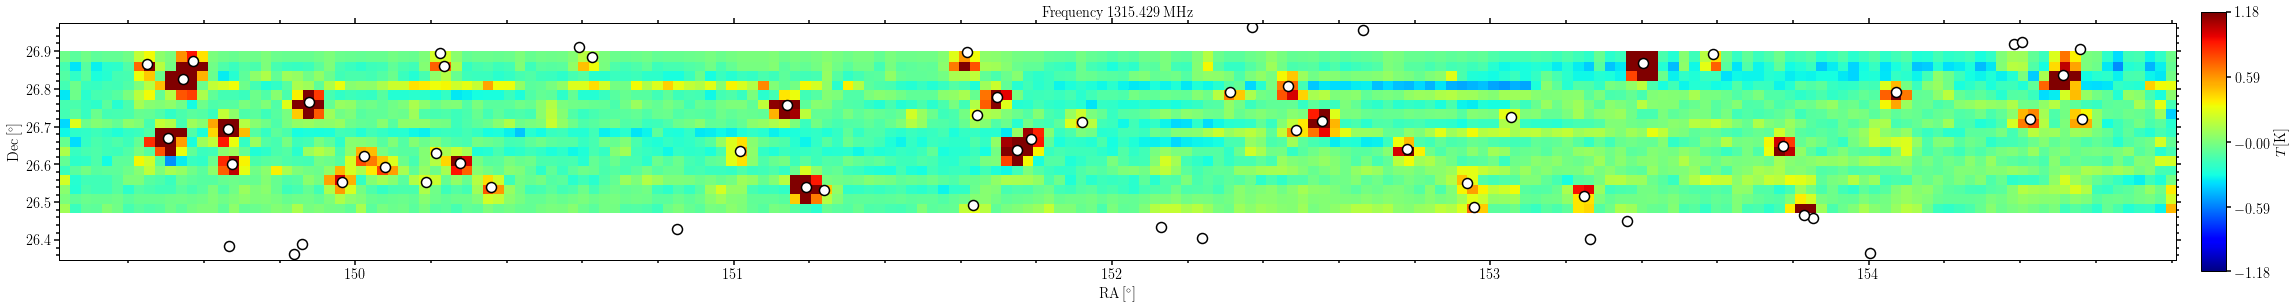

In [9]:
from tlpipe.plot import plot_map as pm
reload(pm)
xlim = [None, None]
ylim = [None, None]
freq = 10

map_path = '/home/wangyg/data/tlpipe_output/bk/maps_bpcal_rb_f5000-f6024/'
#map_name = 'SDSS_N_2a_arcdrfit0021-0030_linear_vis.h5'
map_type = 'clean_map'

output = '/home/wangyg/data/tlpipe_output/bk/May31_3.png'

map_name = 'SDSS_N_0531_arcdrift_linear_vis.h5'
imap = pm.load_maps(map_path, map_name, map_type)
pm.plot_map(imap, indx = (freq, ), figsize=(35, 6), 
            xlim=xlim, ylim=ylim, mK=False,
            sigma=3., smoothing=False, 
            nvss_path = '/home/wangyg/data/NVSS/nvss_N25-N27.fits',
            c_label=r'$T[{\rm K}]$',
            output=output)